# Explorative Data Analysis 🐼

In [1]:
from src.data_preprocessing import get_clean_review_data

import gzip
from pathlib import Path
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [4]:
print(Path.cwd())

/Users/rebeccachen/Desktop/RSDB


In [5]:
url = "https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/googlelocal/review-California_10.json.gz"
meta_url = "https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/googlelocal/meta-California.json.gz"
df = get_clean_review_data(url, meta_url)

Loading metadata from: /Users/rebeccachen/Desktop/RSDB/data/california_clean_metadata.json.gz
Loaded 463084 metadata entries.
Processing review data from: /Users/rebeccachen/Desktop/RSDB/data/california_clean_data.json.gz
Processed and saved chunk 0
Processed and saved chunk 1
Processed and saved chunk 2
Processed and saved chunk 3
Processed and saved chunk 4
Processed and saved chunk 5
Processed and saved chunk 6
Processed and saved chunk 7
Processed and saved chunk 8
Processed and saved chunk 9
Processed and saved chunk 10
Processed and saved chunk 11
Processed and saved chunk 12
Processed and saved chunk 13
Processed and saved chunk 14
Processed and saved chunk 15
Processed and saved chunk 16
Processed and saved chunk 17
Processed and saved chunk 18
Processed and saved chunk 19
Processed and saved chunk 20
Processed and saved chunk 21
Processed and saved chunk 22
Processed and saved chunk 23
Processed and saved chunk 24
Processed and saved chunk 25
Processed and saved chunk 26
Proce

KeyboardInterrupt: 

In [ ]:
df = df.drop_duplicates(subset=["reviewer_id", "text", "gmap_id"])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41932492 entries, 0 to 42439710
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   reviewer_id        float64
 1   reviewer_name      object 
 2   review_time(unix)  int64  
 3   rating             int64  
 4   text               object 
 5   resp               object 
 6   gmap_id            object 
 7   has_rep            bool   
 8   gmap_name          object 
 9   address            object 
 10  latitude           float64
 11  longitude          float64
 12  description        object 
 13  category           object 
 14  avg_rating         float64
 15  num_of_reviews     int64  
 16  price              object 
 17  hours              object 
 18  MISC               object 
 19  relative_results   object 
dtypes: bool(1), float64(4), int64(3), object(12)
memory usage: 6.3+ GB


In [21]:
df.head(5)

,reviewer_id,reviewer_name,review_time(unix),rating,text,resp,gmap_id,has_rep,gmap_name,address,latitude,longitude,description,category,avg_rating,num_of_reviews,price,hours,MISC,relative_results
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,False,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",34.058092,-118.29213,NaN,[Korean restaurant],4.4,18,NaN,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...","[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2..."
2,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,False,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",34.058092,-118.29213,NaN,[Korean restaurant],4.4,18,NaN,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...","[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2..."
4,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,False,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",34.058092,-118.29213,NaN,[Korean restaurant],4.4,18,NaN,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...","[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2..."
6,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,False,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",34.058092,-118.29213,NaN,[Korean restaurant],4.4,18,NaN,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...","[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2..."
8,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,False,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",34.058092,-118.29213,NaN,[Korean restaurant],4.4,18,NaN,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...","[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2..."


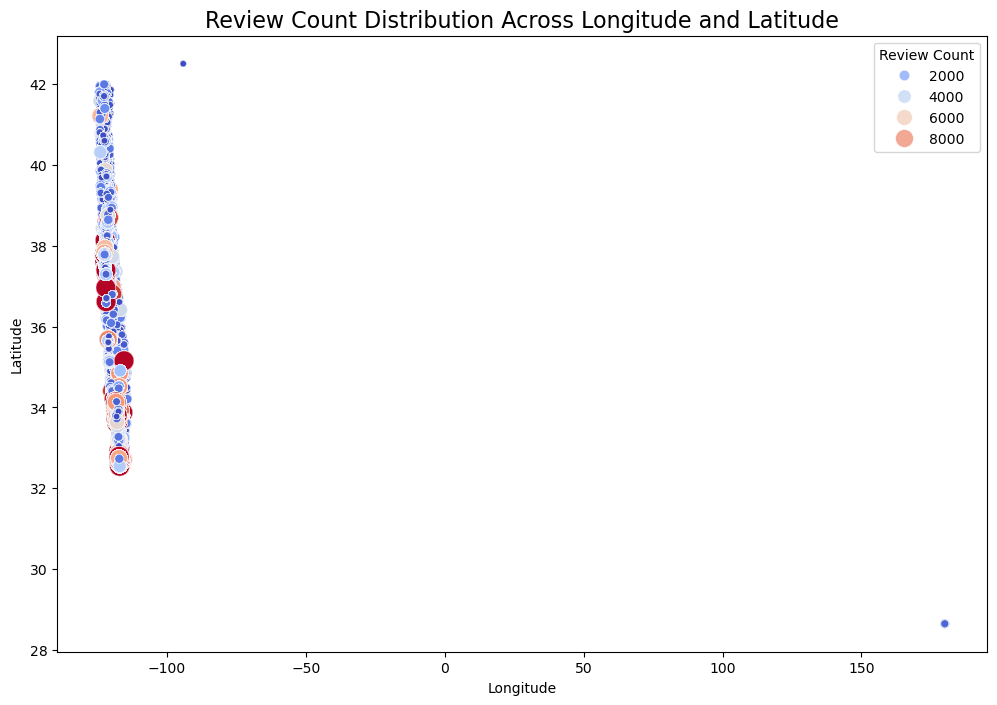

In [33]:
# Step 1: Review Count Distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="longitude", y="latitude", size="num_of_reviews", sizes=(20, 200), alpha=0.7, hue="num_of_reviews", palette="coolwarm")
plt.title('Review Count Distribution Across Longitude and Latitude', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="Review Count", loc='upper right')
plt.show()


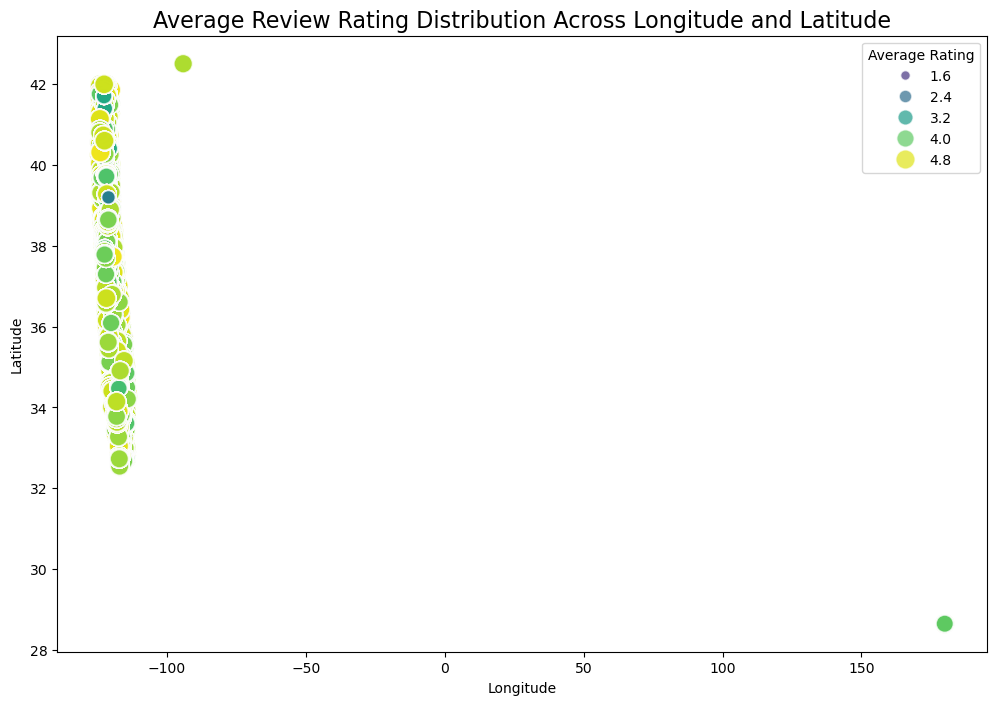

In [34]:
# Step 2: Average Review Rating Distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="longitude", y="latitude", size="avg_rating", sizes=(20, 200), alpha=0.7, hue="avg_rating", palette="viridis")
plt.title('Average Review Rating Distribution Across Longitude and Latitude', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="Average Rating", loc='upper right')
plt.show()


In [ ]:
# CA longitude and latitude boundary
lat_min, lat_max = 32.5, 42.0
lon_min, lon_max = -124.4, -114.1

invalid_entries = df[
    (df['latitude'] < lat_min) | (df['latitude'] > lat_max) |
    (df['longitude'] < lon_min) | (df['longitude'] > lon_max)
]

#print(f"Number of invalid entries: {len(invalid_entries)}")

invalid_entries


NameError: name 'df' is not defined

In [39]:
import folium


In [40]:
# Step 1: Convert Unix Time to Datetime
df_copy = df.copy()
df_copy['review_time'] = pd.to_datetime(df_copy['review_time(unix)'], unit='s')

# Step 2: Filter Data for the Years 2005-2024
df_filtered = df_copy[(df_copy['review_time'] >= '2005-01-01') & (df_copy['review_time'] <= '2024-12-31')]

# Step 3: Create Period Columns for 5-Year Intervals
df_filtered['time_period'] = pd.cut(df_filtered['review_time'].dt.year, bins=[2005, 2009, 2014, 2019, 2024], right=True, labels=['2005-2009', '2010-2014', '2015-2019', '2020-2024'])

# Step 4: Group by Time Period and Location, Calculate Average Rating
df_avg_rating_time = df_filtered.groupby(['time_period', 'gmap_id'])['avg_rating'].mean().reset_index()

# Function to plot the map for each time period
def plot_location_map(df, time_period):
    # Filter data for the specific time period
    df_filtered_period = df[df['time_period'] == time_period]
    
    if df_filtered_period.empty:
        print(f"No data available for {time_period}")
        return
    
    # Create a map centered on the mean latitude and longitude of the filtered data
    map_center = [df_filtered_period['latitude'].mean(), df_filtered_period['longitude'].mean()]
    m = folium.Map(location=map_center, zoom_start=10)
    
    # Add markers for each location
    for _, row in df_filtered_period.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=10,
            popup=f"Location: {row['gmap_name']}<br>Avg Rating: {row['avg_rating']}",
            color="blue" if row['avg_rating'] > 3 else "red",
            fill=True,
            fill_color="blue" if row['avg_rating'] > 3 else "red",
            fill_opacity=0.6
        ).add_to(m)
    
    # Save the map as an HTML file for the time period
    m.save(f"map_{time_period}.html")





: 

In [ ]:
# Step 5: Create Maps for Each 5-Year Period
time_periods = ['2005-2009', '2010-2014', '2015-2019', '2020-2024']

for period in time_periods:
    plot_location_map(df_avg_rating_time, period)